<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/fork_of_notebook1ca06f35f5_crys_empate_menos_id_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#df = pd.read_csv('/kaggle/input/labdata-churn-challenge-2020/train.csv')
#df.head()

In [1]:
# eu
import numpy as np # linear algebra
import pandas as pd

url_train = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/train.csv'
url_test = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/test.csv'
url_sample_submission = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/sample_submission.csv'

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_sample_submission = pd.read_csv(url_sample_submission)

df = df_train.copy()
df_teste = df_test.copy()

In [5]:
df_churn = df.copy()

In [ ]:
df_churn.head()

In [ ]:
df_churn.isna().sum()

In [ ]:
df_churn.shape

In [ ]:
df_churn['Churn'].value_counts()

In [ ]:
#df_teste = pd.read_csv('/kaggle/input/labdata-churn-challenge-2020/test.csv')
#df_teste.isna().sum()

Tratamento dos NaN's: Mediana e Moda

In [ ]:
df_churn.columns

Outliers

In [2]:
def f_trata_outliers(df):
    for i in df.select_dtypes(include=['float64']).columns:
        q1 = np.percentile(df[i],25)
        q3 = np.percentile(df[i],75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        df[i][df[i] < lim_inf] = lim_inf
        df[i][df[i] > lim_sup] = lim_sup
    return df

In [3]:
def f_trata_col(df):
    df.columns = df.columns.str.lower()
    df['paymentmethod'].fillna('Electronic check',inplace=True)
    df['dependents'].fillna('No',inplace=True)
    df['tenure'] = df['tenure'].fillna(df['tenure'].median())
    df['totalcharges'][df['totalcharges'] == ' '] = 0
    df['totalcharges'] = pd.to_numeric(df['totalcharges'])
    df['totalcharges'][df['totalcharges'] == 0] = df['totalcharges'][df['totalcharges'] != 0].median()
    df = f_trata_outliers(df)
    ohe = pd.get_dummies(df)
    return ohe

In [6]:
df_churn = f_trata_col(df_churn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying

In [11]:
df_X = df_churn.drop(columns= 'churn', axis= 1)
df_y = df_churn['churn']

In [7]:
df_teste = f_trata_col(df_teste)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying

In [ ]:
df_teste.isna().sum()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

MODELO: XGBoost

In [9]:
i_CV = 10 # Número de Cross-Validations
i_Seed = 22091980 # semente por questões de reproducibilidade
# f_Test_Size = 0.3 # Proporção do dataframe de validação (outros valores poderiam ser 0.15, 0.20 ou 0.25)

In [12]:
# from sklearn.model_selection import train_test_split

# X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size = f_Test_Size, random_state = i_Seed)

y_teste = df_sample_submission['Churn']
X_treinamento = df_X.copy()
y_treinamento = df_y.copy()
X_teste = df_teste.copy()

In [13]:
# from sklearn.model_selection import train_test_split

# X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size = f_Test_Size, random_state = i_Seed)

y_teste = df_sample_submission['Churn']
X_treinamento = df_X.drop('id',axis=1)
y_treinamento = df_y.copy()
X_teste = df_teste.drop('id',axis=1)

In [14]:
f'"X_treinamento.shape:" {X_treinamento.shape}, "y_treinamento_shape:"{y_treinamento.shape},"X_teste.shape:"{X_teste.shape},"y_teste.shape:"{y_teste.shape}'



'"X_treinamento.shape:" (5634, 45), "y_treinamento_shape:"(5634,),"X_teste.shape:"(1409, 45),"y_teste.shape:"(1409,)'

In [ ]:
#pip install xgboost

In [15]:
from xgboost import XGBClassifier
import xgboost as xgb

# Instancia...
ml_XGB= XGBClassifier(silent=False, 
                         scale_pos_weight=1,
                        learning_rate=0.01,  
                        colsample_bytree = 1,
                        subsample = 0.8,
                        objective='binary:logistic', 
                        n_estimators=1000, 
                        reg_alpha = 0.3,
                        max_depth= 3, 
                        gamma=1, 
                        max_delta_step=5)

# Treina... 
ml_XGB.fit(X_treinamento, y_treinamento)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=5, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
def funcao_cross_val_score(modelo, X_treinamento, y_treinamento, CV):
    #versão com cross_val_score::
    a_scores_CV = cross_val_score(modelo, X_treinamento, y_treinamento, cv = CV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    return a_scores_CV

In [18]:
a_scores_CV = funcao_cross_val_score(ml_XGB, X_treinamento, y_treinamento, i_CV)

Média das Acurácias calculadas pelo CV....: 81.06
std médio das Acurácias calculadas pelo CV: 1.7000000000000002


In [19]:
a_scores_CV

array([0.82092199, 0.82092199, 0.79964539, 0.79432624, 0.77442274,
       0.82415631, 0.8365897 , 0.81349911, 0.80284192, 0.81882771])

In [20]:
y_pred = ml_XGB.predict(X_teste)


In [ ]:
y_pred

In [21]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [1102  307]]


In [22]:
df_to_submit = pd.DataFrame(zip(df_test['id'],y_pred), columns = ['id','churn'])

In [24]:
df_to_submit.to_csv('submit_13UP.csv', index=False, sep=',')

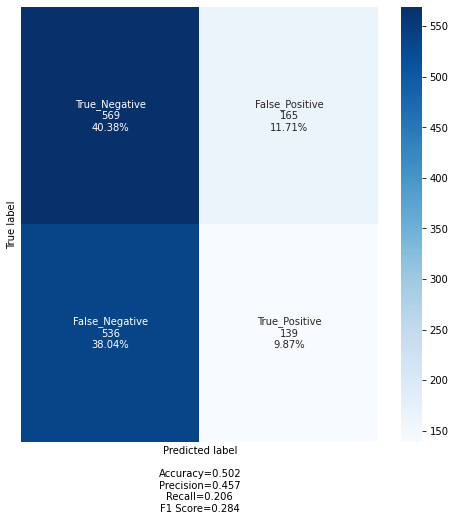

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_teste, y_pred)
#cf_matrix

#print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
#cf_matrix = confusion_matrix(y_teste, y_pred)
#cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
#cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

In [ ]:
# ml_XGB.fit(df_X, df_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=5, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [ ]:
#df_teste_submit = f_trata_col(df_teste)
df_teste_submit = df_teste.copy()
df_teste_submit.head()

,id,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,5027,0,23.0,20.00,445.30,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1,1733,1,61.0,99.00,5969.30,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0
2,5384,0,36.0,84.75,3050.15,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
3,6554,0,61.0,61.45,3751.15,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
4,364,0,47.0,20.55,945.70,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1


In [ ]:
y_teste_submit = ml_XGB.predict(df_teste_submit)

In [ ]:
df_submit = pd.DataFrame(zip(df_teste_submit['id'],y_teste_submit), columns = ['id','Churn'])

In [ ]:
df_submit.head()

In [ ]:
df_submit.to_csv('submit12.csv',index = False, sep = ',')

In [ ]:
df_submit.Churn.value_counts()

0    1105
1     304
Name: Churn, dtype: int64

In [ ]:
df_sample_submission['Churn'].value_counts()

0    734
1    675
Name: Churn, dtype: int64

In [ ]:
734/1105

In [ ]:
#
# 05/11/2020
#

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV # para otimizar os hiperparâmetros dos modelos preditivos
from sklearn.model_selection import cross_val_score # Para o CV (Cross-Validation)
from sklearn.model_selection import cross_validate

from time import time
from operator import itemgetter
from scipy.stats import randint

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

np.set_printoptions(suppress=True)

def GridSearchOptimizer(modelo, ml_Opt, d_hiperparametros, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas):
    ml_GridSearchCV = GridSearchCV(modelo, d_hiperparametros, cv = i_CV, n_jobs = -1, verbose= 10, scoring = 'accuracy')
    start = time()
    ml_GridSearchCV.fit(X_treinamento, y_treinamento)
    tempo_elapsed = time()-start
    #print(f"\nGridSearchCV levou {tempo_elapsed:.2f} segundos.")

    # Hiperparâmetros que otimizam a classificação:
    print(f'\nHiperparâmetros otimizados: {ml_GridSearchCV.best_params_}')
    
    if ml_Opt == 'ml_DT2':
        print(f'\nDecisionTreeClassifier *********************************************************************************************************')
        ml_Opt = DecisionTreeClassifier(criterion= ml_GridSearchCV.best_params_['criterion'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_leaf_nodes= ml_GridSearchCV.best_params_['max_leaf_nodes'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_split'], 
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_RF2':
        print(f'\nRandomForestClassifier *********************************************************************************************************')
        ml_Opt = RandomForestClassifier(bootstrap= ml_GridSearchCV.best_params_['bootstrap'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_features= ml_GridSearchCV.best_params_['max_features'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_split'],
                                        n_estimators= ml_GridSearchCV.best_params_['n_estimators'],
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_AB2':
        print(f'\nAdaBoostClassifier *********************************************************************************************************')
        ml_Opt = AdaBoostClassifier(algorithm='SAMME.R', 
                                    base_estimator=RandomForestClassifier(bootstrap = False, 
                                                                          max_depth = 10, 
                                                                          max_features = 'auto', 
                                                                          min_samples_leaf = 1, 
                                                                          min_samples_split = 2, 
                                                                          n_estimators = 400), 
                                    learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                    n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                    random_state = i_Seed)
        
    elif ml_Opt == 'ml_GB2':
        print(f'\nGradientBoostingClassifier *********************************************************************************************************')
        ml_Opt = GradientBoostingClassifier(learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                            n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                            max_depth = ml_GridSearchCV.best_params_['max_depth'], 
                                            min_samples_split = ml_GridSearchCV.best_params_['min_samples_split'], 
                                            min_samples_leaf = ml_GridSearchCV.best_params_['min_samples_leaf'], 
                                            max_features = ml_GridSearchCV.best_params_['max_features'])
        
    elif ml_Opt == 'ml_XGB2':
        print(f'\nXGBoostingClassifier *********************************************************************************************************')
        ml_Opt = XGBoostingClassifier(#learning_rate= ml_GridSearchCV.best_params_['learning_rate'], 
                                      max_depth= ml_GridSearchCV.best_params_['max_depth'], 
                                      #colsample_bytree= ml_GridSearchCV.best_params_['colsample_bytree'], 
                                      #subsample= ml_GridSearchCV.best_params_['subsample'], 
                                      #gamma= ml_GridSearchCV.best_params_['gamma'], 
                                      min_child_weight= ml_GridSearchCV.best_params_['min_child_weight'])
        
    # Treina novamente usando os hiperparâmetros otimizados...
    ml_Opt.fit(X_treinamento, y_treinamento)

    # Cross-Validation com 10 folds
    print(f'\n********* CROSS-VALIDATION ***********')
    a_scores_CV = funcao_cross_val_score(ml_Opt, X_treinamento, y_treinamento, i_CV)

    # Faz predições com os hiperparâmetros otimizados...
    y_pred = ml_Opt.predict(X_teste)
  
    # Importância das COLUNAS
    print(f'\n********* IMPORTÂNCIA DAS COLUNAS ***********')
    df_importancia_variaveis = pd.DataFrame(zip(l_colunas, ml_Opt.feature_importances_), columns= ['coluna', 'importancia'])
    df_importancia_variaveis = df_importancia_variaveis.sort_values(by= ['importancia'], ascending=False)
    print(df_importancia_variaveis)

    # Matriz de Confusão
    print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
    cf_matrix = confusion_matrix(y_teste, y_pred)
    cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
    cf_categories = ['Zero', 'One']
    mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

    return ml_Opt, ml_GridSearchCV.best_params_

In [ ]:
# Dicionário de Hiperparâmetros para XGBoost:
#d_hiperparametros_XGB = {'min_child_weight': [7]} #[i for i in np.arange(1, 13)]} #,
#                'gamma': [i for i in np.arange(0, 5, 0.5)],
#                'subsample': [0.6, 0.8, 1.0],
#                'colsample_bytree': [0.6, 0.8, 1.0],
#                'max_depth': [3, 4, 5, 7, 9],
#                'learning_rate': [i for i in np.arange(0.01, 1, 0.1)]}

In [ ]:
# Dicionário de Hiperparâmetros para XGBoost:
d_hiperparametros_XGB = {'min_child_weight': [7],} #[i for i in np.arange(1, 13)]} #,
#                'gamma': [i for i in np.arange(0, 5, 0.5)],
#                'subsample': [0.6, 0.8, 1.0],
#                'colsample_bytree': [0.6, 0.8, 1.0],
                          'max_depth': [3, 4, 5, 7, 9]}
#                'learning_rate': [i for i in np.arange(0.01, 1, 0.1)]}

In [ ]:
# Invoca a função

l_colunas = X_treinamento.columns
ml_XGB, best_params= GridSearchOptimizer(ml_XGB, 'ml_XGB2', d_hiperparametros_XGB, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished



Hiperparâmetros otimizados: {'min_child_weight': 7}

XGBoostingClassifier *********************************************************************************************************


NameError: ignored

In [ ]:
# Como o procedimento acima levou 372 minutos para executar, então vou estimar ml_XGB2 abaixo usando os parâmetros acima estimados
best_params= {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.51, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}

ml_XGB2= XGBClassifier(min_child_weight= best_params['min_child_weight'], 
                       gamma= best_params['gamma'], 
                       subsample= best_params['subsample'], 
                       colsample_bytree= best_params['colsample_bytree'], 
                       max_depth= best_params['max_depth'], 
                       learning_rate= best_params['learning_rate'], 
                       random_state= i_Seed)

In [ ]:
ml_XGB2.fit(X_treinamento,y_treinamento)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.51, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=22091980,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

Text(0, 0.5, 'features')

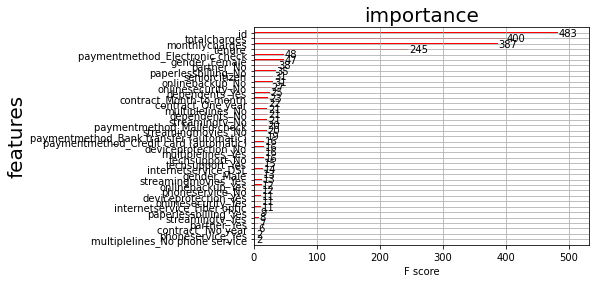

In [ ]:
# SELECIONA AS COLUNAS IMPORTANTES

# plot feature importance
from xgboost import plot_importance

xgb.plot_importance(ml_XGB2, color = 'red')
plt.title('importance', fontsize = 20)
plt.yticks(fontsize = 10)
plt.ylabel('features', fontsize = 20)

In [ ]:
ml_XGB2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.51, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=22091980,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [ ]:
from sklearn.feature_selection import SelectFromModel

def seleciona_colunas_relevantes(modelo, X_treinamento, X_teste, threshold = 0.05):
    # Cria um seletor para selecionar as COLUNAS com importância > threshold
    sfm = SelectFromModel(modelo, threshold)
    
    # Treina o seletor
    sfm.fit(X_treinamento, y_treinamento)

    # Mostra o indice das COLUNAS mais importantes
    print(f'\n********** COLUNAS Relevantes ******')
    print(sfm.get_support(indices=True))

    # Seleciona somente as COLUNAS relevantes
    X_treinamento_I = sfm.transform(X_treinamento)
    X_teste_I = sfm.transform(X_teste)
    return X_treinamento_I, X_teste_I   

In [ ]:
X_treinamento_XGB, X_teste_XGB= seleciona_colunas_relevantes(ml_XGB2, X_treinamento, X_teste)


********** COLUNAS Relevantes ******
[17 37 39]


In [ ]:
# TREINA O CLASSIFICADOR COM AS COLUNAS RELEVANTES
best_params

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'learning_rate': 0.51,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.6}

In [ ]:
# Treina com as COLUNAS relevantes...
ml_XGB2.fit(X_treinamento_XGB, y_treinamento)

# Cross-Validation com 10 folds
a_scores_CV = funcao_cross_val_score(ml_XGB2, X_treinamento_XGB, y_treinamento, i_CV)

Média das Acurácias calculadas pelo CV....: 76.94
std médio das Acurácias calculadas pelo CV: 2.48


In [ ]:
X_teste_XGB.shape

(1409, 3)

In [ ]:
X_teste_XGB

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# VALIDA O MODELO USANDO O DATAFRAME X_TESTE

y_pred_XGB = ml_XGB2.predict(X_teste_XGB)

# Calcula acurácia
from sklearn.metrics import accuracy_score # para medir a acurácia do modelo preditivo
accuracy_score(y_teste, y_pred_XGB)

0.5053229240596168

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_teste, y_pred_XGB)
#cf_matrix

#print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
#cf_matrix = confusion_matrix(y_teste, y_pred)
#cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
#cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

In [ ]:
accuracy_score(y_teste, y_pred_XGB)

In [ ]:

unique_elements, counts_elements = np.unique(y_pred_XGB, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))


Frequency of unique values of the said array:
[[  0   1]
 [969 440]]


In [ ]:
len(y_pred_XGB)

1409

In [ ]:
df_submit = pd.DataFrame(zip(df_teste_submit['id'],y_pred_XGB), columns = ['id','Churn'])

In [ ]:
df_submit.to_csv('submit13.csv',index = False, sep = ',')